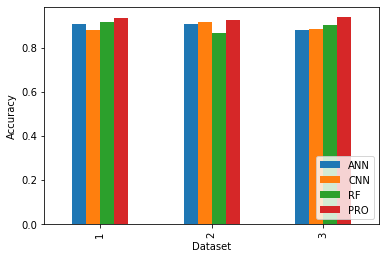

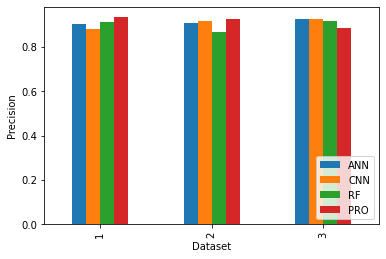

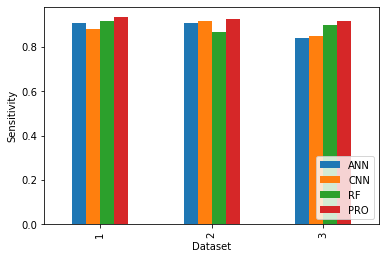

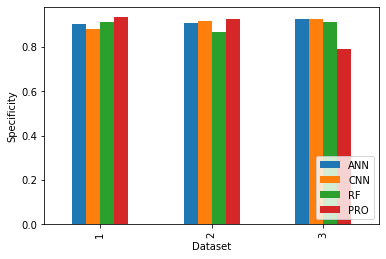

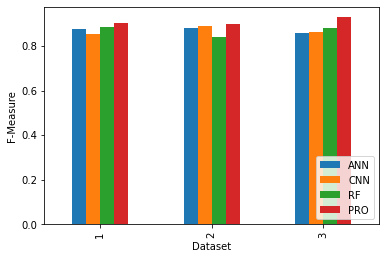

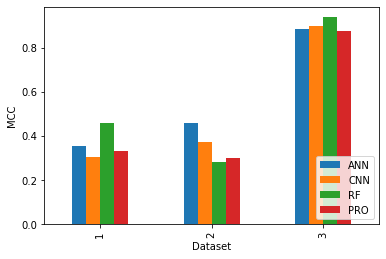

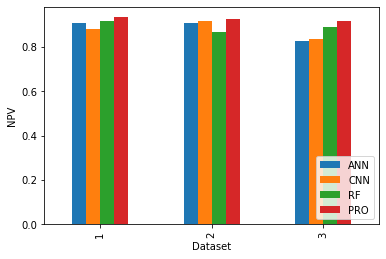

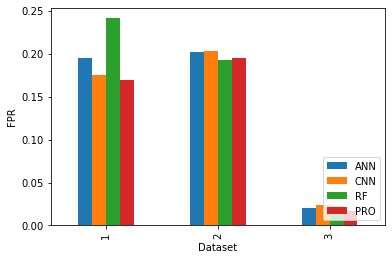

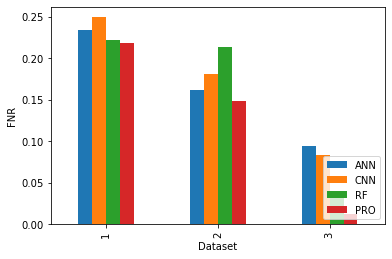

Testing Metrices-Dataset 1
                  ANN       CNN        RF       PRO
Accuracy     0.905088  0.879992  0.914717  0.934048
Precision    0.903484  0.879992  0.913095  0.934048
Sensitivity  0.906599  0.879992  0.916244  0.934048
Specificity  0.903674  0.879992  0.913288  0.934048
F-Measure    0.877001  0.852776  0.886331  0.905160
MCC          0.356266  0.306685  0.460320  0.335231
NPV          0.906599  0.879992  0.916244  0.934048
FPR          0.195263  0.175195  0.241580  0.169133
FNR          0.233955  0.249296  0.222434  0.218475
Training Metrices-Dataset 1
                  ANN       CNN        RF       PRO
Accuracy     0.970200  0.970200  0.969507  0.970200
Precision    0.970200  0.970200  0.968835  0.970200
Sensitivity  0.970200  0.970200  0.970200  0.970200
Specificity  0.970200  0.970200  0.968794  0.970200
F-Measure    0.965325  0.965325  0.964642  0.965325
MCC          0.297004  0.346584  0.481114  0.424196
NPV          0.970200  0.970200  0.970200  0.970200
FPR      

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from objective_function import objfun2
from PSO import QPSO, BasePSO
from load_save import save, load
from BWO import BaseBWO
from plot_res import plot_res
from classifier import *

def full_analysis():
    X_train = load('X_train')
    X_test = load('X_test')
    y_train = load('y_train')
    y_test = load('y_test')

    ## Setting parameters
    obj_func = objfun2
    # lb = [-15, -10, -3, -15, -10, -3, -15, -10, -3, -15, -10, -3, -15, -10, -3]
    # ub = [15, 10, 3, 15, 10, 3, 15, 10, 3, 15, 10, 3, 15, 10, 3]
    lb = [0]
    ub = [1]
    problem_size = 2
    batch_size = 25
    verbose = True
    epoch = 10
    pop_size = 10
    pro, cnn_val, ann_val, rf_val=[], [], [], []
    for i in range(3):

        save('cur_X_train', X_train[i])
        save('cur_X_test', X_test[i])
        save('cur_y_train', y_train[i])
        save('cur_y_test', y_test[i])


        # Proposed
        md1 = BaseBWO(obj_func, lb, ub, problem_size, batch_size, verbose, epoch, pop_size)
        best_pos1, best_fit1, list_loss1 = md1.train()
        pro.append(best_pos1)

        # CNN
        pred, met, met_train = cnn(X_train[i], y_train[i], X_test[i], y_test[i])
        cnn_val.append([met, met_train])


        # ANN
        pred, met, met_train = ann(X_train[i], y_train[i], X_test[i], y_test[i])
        ann_val.append([met, met_train])


        # RF
        pred, met, met_train = rf(X_train[i], y_train[i], X_test[i], y_test[i])
        rf_val.append([met, met_train])

    # save('pro', pro)
    # save('cnn_val', cnn_val)
    # save('ann_val', ann_val)
    # save('rf_val', rf_val)



an=0
if an==1:
    full_analysis()

plot_res()

